In [1]:
# %load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from matplotlib.ticker import FormatStrFormatter
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell
from tabulate import tabulate
from scipy.stats import shapiro
from random import normalvariate

InteractiveShell.ast_node_interactivity = "all"

import texttable
import gc
import timeit
import sys
import os

## Loading reported and synthetic data

In [3]:
# Revoking stored reported data
# https://ipython.org/ipython-doc/rel-0.12/config/extensions/storemagic.html

%store -r data_Averoy
%store -r data_Tingvoll
%store -r data_Surnadal
%store -r data_Sunndal
%store -r data_Vestnes
%store -r data_Laerdal

In [4]:
# Revoking top hits frames created by the seen deer estimator
save_dir = "synthetic_data/"
# With option for emigration
top_hits_Averoy_seen_deer = pd.read_pickle(save_dir + "top_hits_Averoy_seen_deer.pkl")
top_hits_Tingvoll_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Tingvoll_seen_deer.pkl"
)
top_hits_Surnadal_seen_deer = pd.read_pickle(
    save_dir + "top_hits_Surnadal_seen_deer.pkl"
)
top_hits_Sunndal_seen_deer = pd.read_pickle(save_dir + "top_hits_Sunndal_seen_deer.pkl")
top_hits_Vestnes_seen_deer = pd.read_pickle(save_dir + "top_hits_Vestnes_seen_deer.pkl")
top_hits_Laerdal_seen_deer = pd.read_pickle(save_dir + "top_hits_Laerdal_seen_deer.pkl")

In [5]:
# Data needed for plotting the figures below
compare = "before_hunt"
municipalities = ["Averoy", "Tingvoll", "Surnadal", "Sunndal", "Vestnes", "Laerdal"]
data_municipality = [
    data_Averoy,
    data_Tingvoll,
    data_Surnadal,
    data_Sunndal,
    data_Vestnes,
    data_Laerdal,
]
top_hits_seen_deer = [
    top_hits_Averoy_seen_deer,
    top_hits_Tingvoll_seen_deer,
    top_hits_Surnadal_seen_deer,
    top_hits_Sunndal_seen_deer,
    top_hits_Vestnes_seen_deer,
    top_hits_Laerdal_seen_deer,
]

afont = {"fontname": "Arial"}

##  Municipality-wise plotting of stochastic parameters across time period

In [6]:
def plot_stochastic_parameters(location):
    df_original = [
            "df_original_sorted_Averoy.pkl",
            "df_original_sorted_Tingvoll.pkl",
            "df_original_sorted_Surnadal.pkl",
            "df_original_sorted_Sunndal.pkl",
            "df_original_sorted_Vestnes.pkl",
            "df_original_sorted_Laerdal.pkl",
        ]

    winter_survival = ["ws_f_calves", "ws_young_hinds", "ws_adult_hinds", "ws_m_calves", "ws_young_stags", "ws_adult_stags", "fertility_y_hinds", "fertility_a_hinds"]
    years = np.arange(1,16)
    year_list = np.arange(2007,2022)
    
    save_dir = "synthetic_data/"
    if location == "Averoy":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Averoy.pkl")
        hits = top_hits_Averoy_seen_deer    
    if location == "Tingvoll":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Tingvoll.pkl")
        hits = top_hits_Tingvoll_seen_deer     
    if location == "Surnadal":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Surnadal.pkl")
        hits = top_hits_Surnadal_seen_deer
    if location == "Sunndal":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Sunndal.pkl")
        hits = top_hits_Sunndal_seen_deer
    if location == "Vestnes":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Vestnes.pkl")
        hits = top_hits_Vestnes_seen_deer
    if location == "Laerdal":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Laerdal.pkl")
        hits = top_hits_Laerdal_seen_deer

    parameters = np.zeros((len(top_hits_Averoy_seen_deer),15,8))
    for i in range(len(hits)):

        # Read parameters data needed for finding records in the original data frame
        identificator = hits.iloc[i, 0:9]

        # Read all 15 records associated with the 9 first parameters above in
        # the sorted original frame
        df_hits = df_municipality.loc[
            (df_municipality["init_pop"] == identificator[0])
            & (df_municipality["init_hps"] == identificator[1])
            & (df_municipality["sh_threshold"] == identificator[2])
            & (df_municipality["i_fcalves"] == identificator[3])
            & (df_municipality["i_yhinds"] == identificator[4])
            & (df_municipality["i_ahinds"] == identificator[5])
            & (df_municipality["i_mcalves"] == identificator[6])
            & (df_municipality["i_ystags"] == identificator[7])
            & (df_municipality["i_astags"] == identificator[8])
        ].copy()

        # Extract all 8 targeted parameters associated with the top hit
        parameters[i,:,:] = df_hits.iloc[:,23:31].values 

    fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
    counter = 0
    for i in range(4):
        for j in range(2):
            ax[i,j].boxplot(parameters[:,:,counter])

            ax[i,j].margins(x=0.01)
            no_text = [""] * 15
            if i < 3:
                ax[i,j].set_xticks(years)
                ax[i,j].set_xticklabels(no_text)
            else:
                ax[i,j].set_xticks(years)
                ax[i,j].set_xticklabels(year_list, rotation="vertical", fontsize=10)
            ax[i,j].set_ylabel(winter_survival[counter], fontsize=12, **afont)
            counter = counter + 1
    fig.suptitle('Variation in winter survival and fertility for ' + location + ' municipality', y=0.92, fontsize=18, **afont)
    save_dir = "figures/"
    plt.savefig(save_dir + "Supp_Figure_2_" + location + ".pdf", dpi=600, bbox_inches="tight")
    return

CPU times: user 8min 55s, sys: 9min 56s, total: 18min 52s
Wall time: 23min 42s


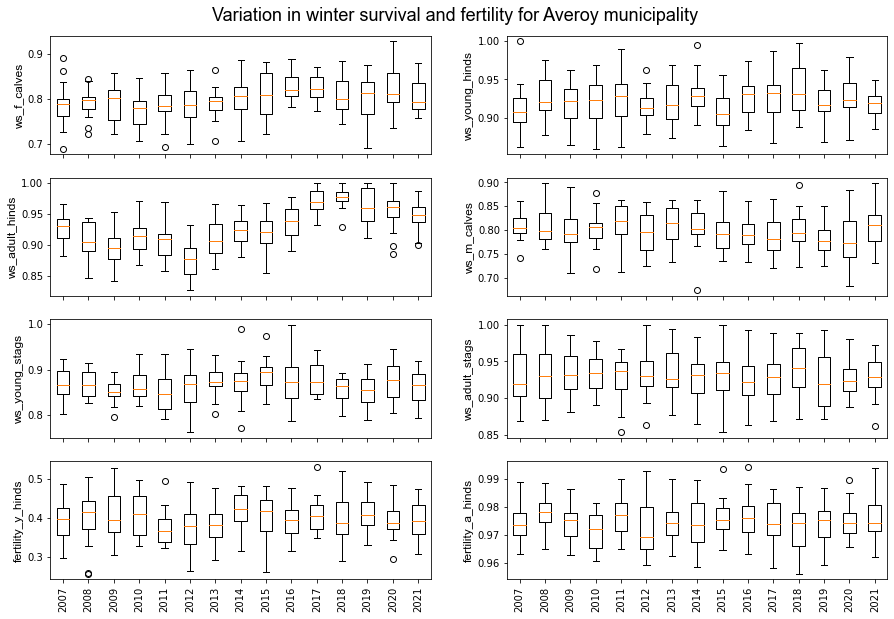

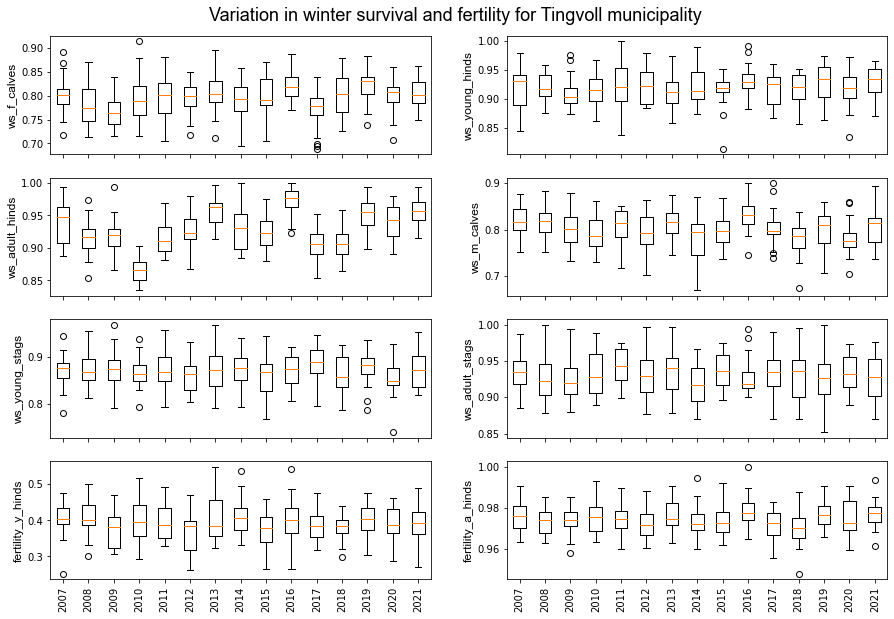

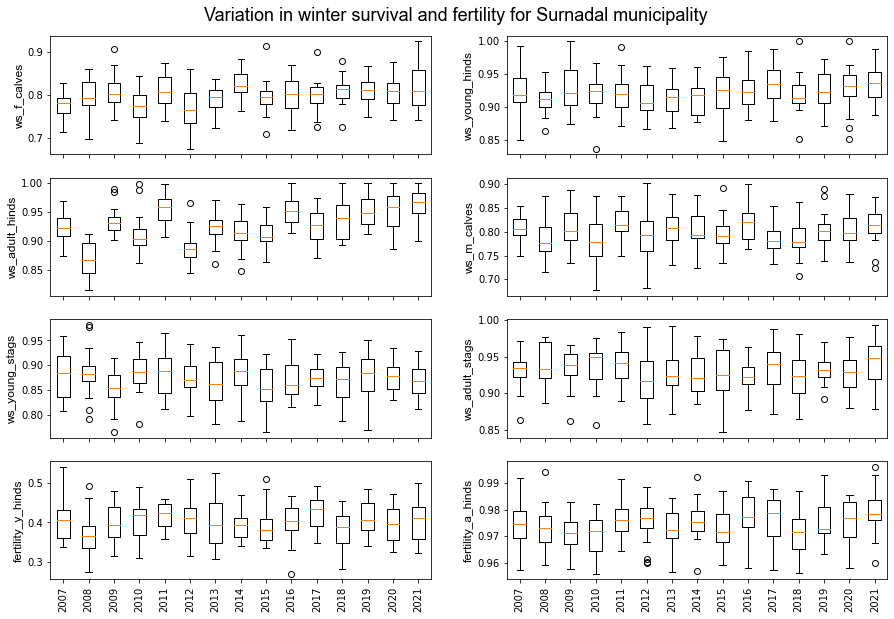

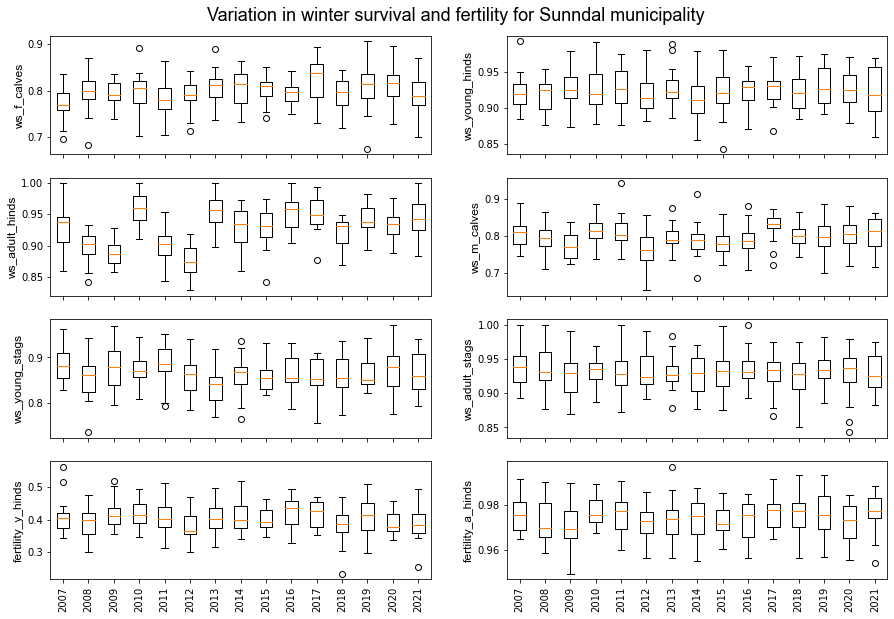

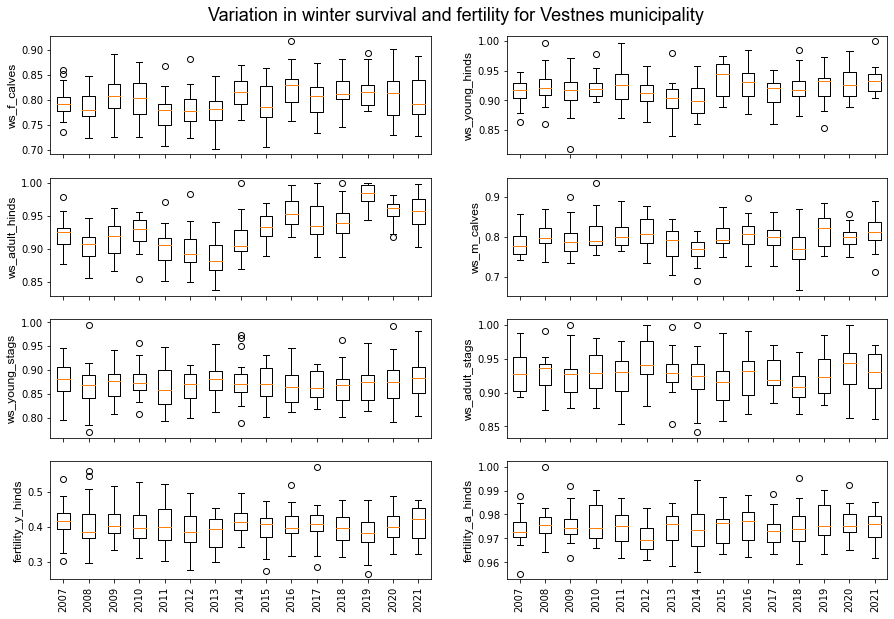

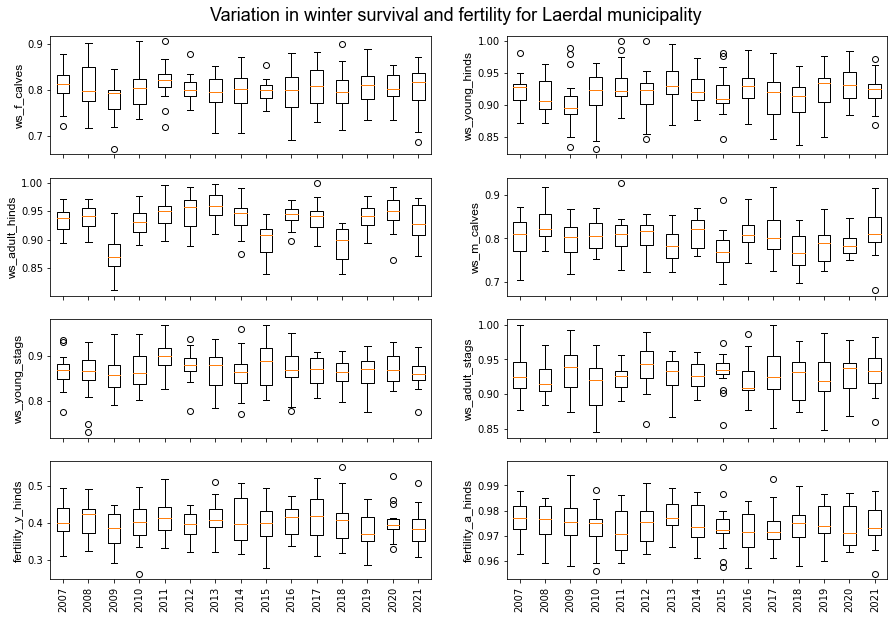

In [7]:
%%time
# Run the show
for municipality in municipalities:
    plot_stochastic_parameters(municipality)

## Plot Shapiro-Wilk p-value distributions of the winter survival parameters and fertility parameters for the top 20 hits over the 15-year time series period, and their mean value distributions and standard deviation distributions. Plus mean values and standard deviation values obtained by drawing random samples from the underlying normal distributions.

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
def Shapiro_Wilk_test(location):
    save_dir = "synthetic_data/"
    if location == "Averoy":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Averoy.pkl")
        hits = top_hits_Averoy_seen_deer    
    if location == "Tingvoll":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Tingvoll.pkl")
        hits = top_hits_Tingvoll_seen_deer     
    if location == "Surnadal":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Surnadal.pkl")
        hits = top_hits_Surnadal_seen_deer
    if location == "Sunndal":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Sunndal.pkl")
        hits = top_hits_Sunndal_seen_deer
    if location == "Vestnes":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Vestnes.pkl")
        hits = top_hits_Vestnes_seen_deer
    if location == "Laerdal":
        df_municipality = pd.read_pickle(save_dir + "df_original_sorted_Laerdal.pkl")
        hits = top_hits_Laerdal_seen_deer
            
    headers = pd.MultiIndex.from_product([["ws_f_c.....................................................................................", 
                                       "ws_y_h.....................................................................................",
                                       "ws_a_h.....................................................................................",
                                       "ws_m_c.....................................................................................",
                                       "ws_y_s.....................................................................................",
                                       "ws_a_s.....................................................................................",
                                       "fert_y_h...................................................................................",
                                       "fert_a_h.................................................................................."],
                                       ["p_parameter", "m_parameter", "std_parameter"]])
    statistic = pd.DataFrame(columns=headers)

    
    parameters = np.zeros((len(hits),15,8))
    for i in range(len(hits)):

        # Read parameters data needed for finding records in the original data frame
        identificator = hits.iloc[i, 0:9]

        # Read all 15 records associated with the 9 first parameters above in
        # the sorted original frame
        df_hits = df_municipality.loc[
            (df_municipality["init_pop"] == identificator[0])
            & (df_municipality["init_hps"] == identificator[1])
            & (df_municipality["sh_threshold"] == identificator[2])
            & (df_municipality["i_fcalves"] == identificator[3])
            & (df_municipality["i_yhinds"] == identificator[4])
            & (df_municipality["i_ahinds"] == identificator[5])
            & (df_municipality["i_mcalves"] == identificator[6])
            & (df_municipality["i_ystags"] == identificator[7])
            & (df_municipality["i_astags"] == identificator[8])
        ].copy()

        # Extract all 8 targeted parameters associated with the top hit
        parameters[i,:,:] = df_hits.iloc[:,23:31].values 
        
        # Do Shapiro-Wilk test
        new_row = []
        for k in range(8):
            stat,p_parameter = shapiro(parameters[i,:,k])
            new_row.extend([p_parameter, np.mean(parameters[i,:,k]), np.std(parameters[i,:,k])])
        statistic.loc[len(statistic)] = new_row
    return statistic   

In [10]:
def plot_SW_p_values(location, statistic):
    fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(15, 17))
    mean_init = [0.8, 0.92, 0.93, 0.8, 0.87, 0.93, 0.4, 0.975]
    std_init =  [0.04, 0.03, 0.03, 0.04, 0.04, 0.03, 0.05, 0.008]
    stoch_parameter = ["ws_f_calves", "ws_young_hinds", "ws_adult_hinds", "ws_m_calves", "ws_young_stags", "ws_adult_stags", "fertility_y_hinds", "fertility_a_hinds"]
    counter = 0
    counter1 = 0
    rng = np.random.default_rng()

    x = np.arange(1,21)
    for i in range(4):
        for j in range(2):
            # Calculate spread of S-W test for N samples from original distribution
            init_p = np.zeros((20,50))
            for z in range(20):
                normal_original = rng.normal(loc=mean_init[counter1], scale=std_init[counter1], size=(50,15))
                for q in range(50):
                    stat,p_init = shapiro(normal_original[q,:])
                    init_p[z,q] = p_init
            init_p_T = init_p.T
            ax[i,j].boxplot(init_p_T[:][:])
            ax[i,j].plot(x, statistic.iloc[:,counter].values, 'o', markerfacecolor='none', ms=5, markeredgecolor='blue')

            ax[i,j].margins(x=0.01)
            no_text = [""] * 20
            if i < 3:
                ax[i,j].set_xticks(x)
                ax[i,j].set_xticklabels(no_text)
            else:
                ax[i,j].set_xticks(x)
                ax[i,j].set_xticklabels(x, fontsize=10)
                ax[i,j].set_xlabel("RSS rank", fontsize=14, **afont)
                
            ax[i,j].set_ylabel("p_SW_" + stoch_parameter[counter1], fontsize=12, **afont)
            ymin = 0
            ymax = 1
            ax[i,j].set_ylim([ymin, ymax])
            counter = counter + 3
            counter1 = counter1 + 1
    fig.suptitle('Variation in Shapiro-Wilk p_values for winter survival and fertility parameters - ' + location + ' municipality', y=0.92, fontsize=18, **afont)
    return

In [11]:
def plot_SW_mean_values(location, statistic):
    fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(15, 17))
    mean_init = [0.8, 0.92, 0.93, 0.8, 0.87, 0.93, 0.4, 0.975]
    std_init =  [0.04, 0.03, 0.03, 0.04, 0.04, 0.03, 0.05, 0.008]
    stoch_parameter = ["ws_f_calves", "ws_young_hinds", "ws_adult_hinds", "ws_m_calves", "ws_young_stags", "ws_adult_stags", "fertility_y_hinds", "fertility_a_hinds"]
    counter = 0
    counter1 = 0
    rng = np.random.default_rng()

    x = np.arange(1,21)
    for i in range(4):
        for j in range(2):
            # Calculate spread of mean values for N samples from original distribution
            init_mean = np.zeros((20,50))
            for z in range(20):
                normal_original = rng.normal(loc=mean_init[counter1], scale=std_init[counter1], size=(50,15))
                mean_sample = np.mean(normal_original, axis=1)
                init_mean[z,:] = mean_sample
            init_mean_T = init_mean.T
            ax[i,j].boxplot(init_mean_T[:][:])
            ax[i,j].plot(x, statistic.iloc[:,counter + 1].values, 'o', markerfacecolor='none', ms=5, markeredgecolor='blue')

            ax[i,j].margins(x=0.01)
            no_text = [""] * 20
            if i < 3:
                ax[i,j].set_xticks(x)
                ax[i,j].set_xticklabels(no_text)
            else:
                ax[i,j].set_xticks(x)
                ax[i,j].set_xticklabels(x, fontsize=10)
                ax[i,j].set_xlabel("RSS rank", fontsize=14, **afont)
                
            ax[i,j].set_ylabel("mean_" + stoch_parameter[counter1], fontsize=12, **afont)
            counter = counter + 3
            counter1 = counter1 + 1
    fig.suptitle('Variation in mean values for winter survival and fertility parameters - ' + location + ' municipality', y=0.92, fontsize=18, **afont)
    return

In [12]:
def plot_SW_std_values(location, statistic):
    fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(15, 17))
    mean_init = [0.8, 0.92, 0.93, 0.8, 0.87, 0.93, 0.4, 0.975]
    std_init =  [0.04, 0.03, 0.03, 0.04, 0.04, 0.03, 0.05, 0.008]
    stoch_parameter = ["ws_f_calves", "ws_young_hinds", "ws_adult_hinds", "ws_m_calves", "ws_young_stags", "ws_adult_stags", "fertility_y_hinds", "fertility_a_hinds"]
    counter = 0
    counter1 = 0
    rng = np.random.default_rng()

    x = np.arange(1,21)
    for i in range(4):
        for j in range(2):
            # Calculate spread of mean values for N samples from original distribution
            init_std = np.zeros((20,50))
            for z in range(20):
                normal_original = rng.normal(loc=mean_init[counter1], scale=std_init[counter1], size=(50,15))
                std_sample = np.std(normal_original, axis=1)
                init_std[z,:] = std_sample
            init_std_T = init_std.T
            ax[i,j].boxplot(init_std_T[:][:])
            ax[i,j].plot(x, statistic.iloc[:,counter + 2].values, 'o', markerfacecolor='none', ms=5, markeredgecolor='blue')

            ax[i,j].margins(x=0.01)
            no_text = [""] * 20
            if i < 3:
                ax[i,j].set_xticks(x)
                ax[i,j].set_xticklabels(no_text)
            else:
                ax[i,j].set_xticks(x)
                ax[i,j].set_xticklabels(x, fontsize=10)
                ax[i,j].set_xlabel("RSS rank", fontsize=14, **afont)
                
            ax[i,j].set_ylabel("std_" + stoch_parameter[counter1], fontsize=12, **afont)
            counter = counter + 3
            counter1 = counter1 + 1
    fig.suptitle('Variation in standard deviation values for winter survival and fertility parameters - ' + location + ' municipality', y=0.92, fontsize=18, **afont)
    return

CPU times: user 8min 41s, sys: 6min 8s, total: 14min 50s
Wall time: 14min 52s


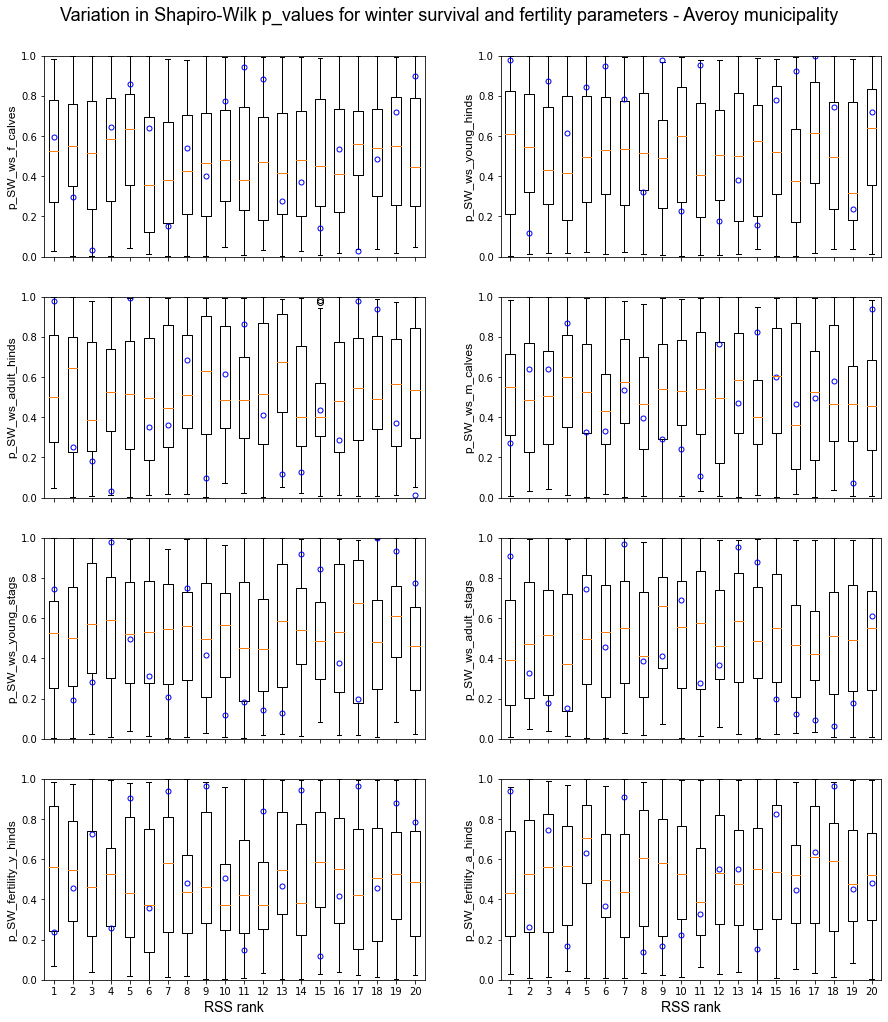

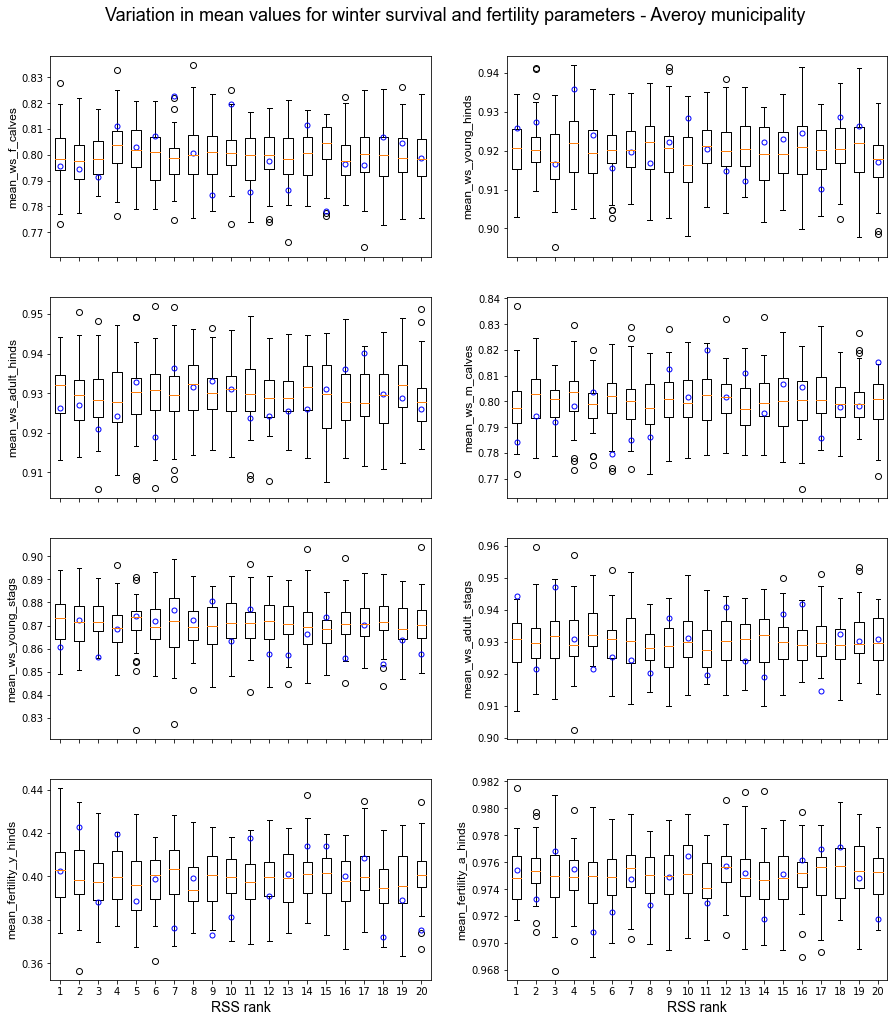

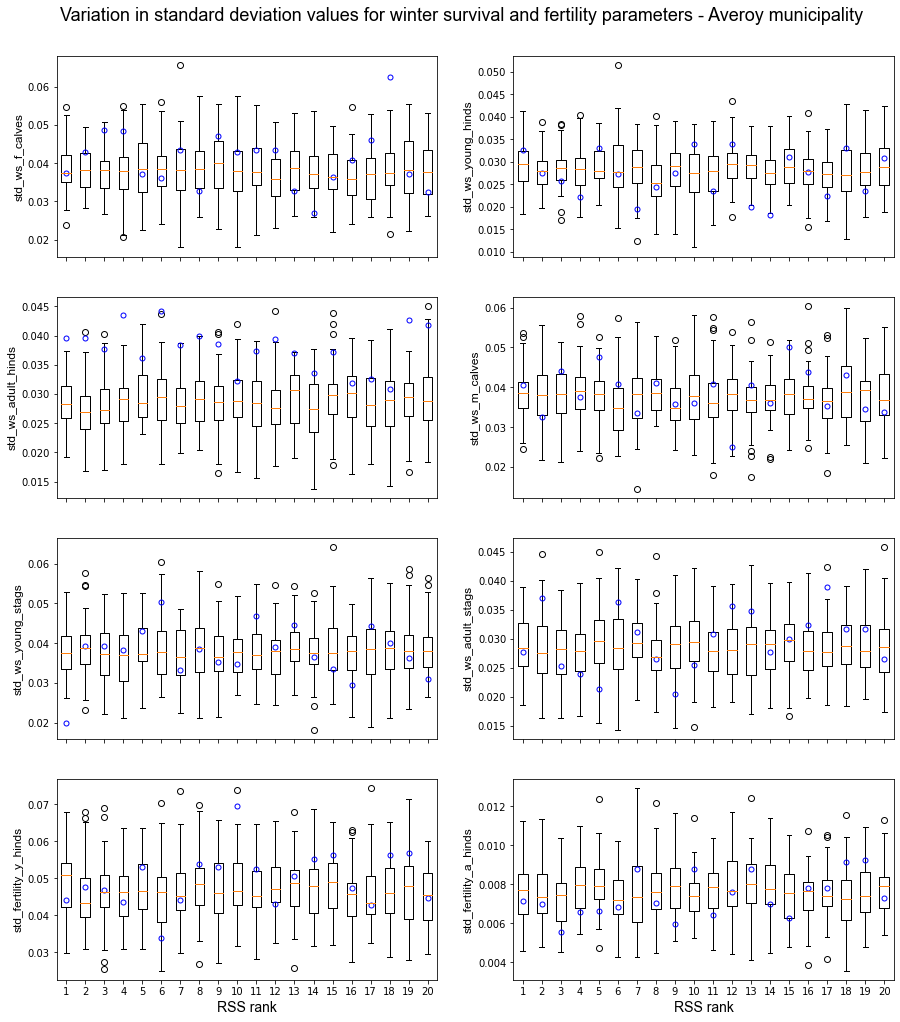

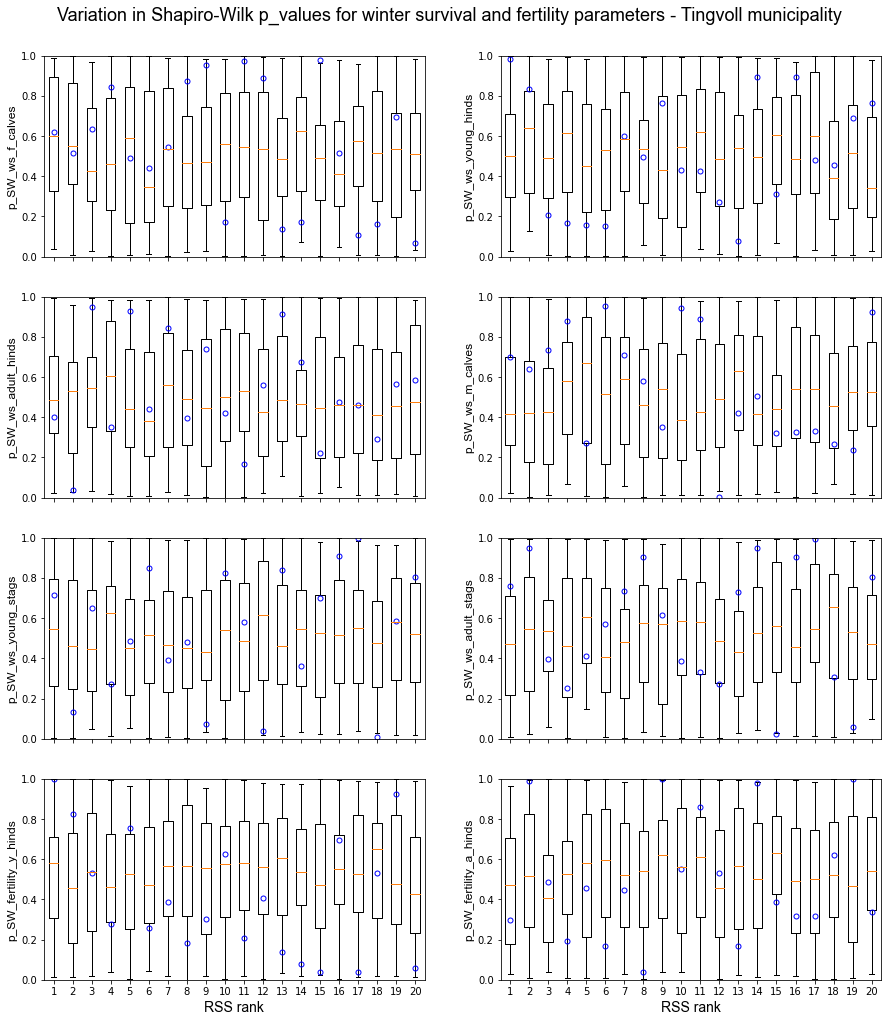

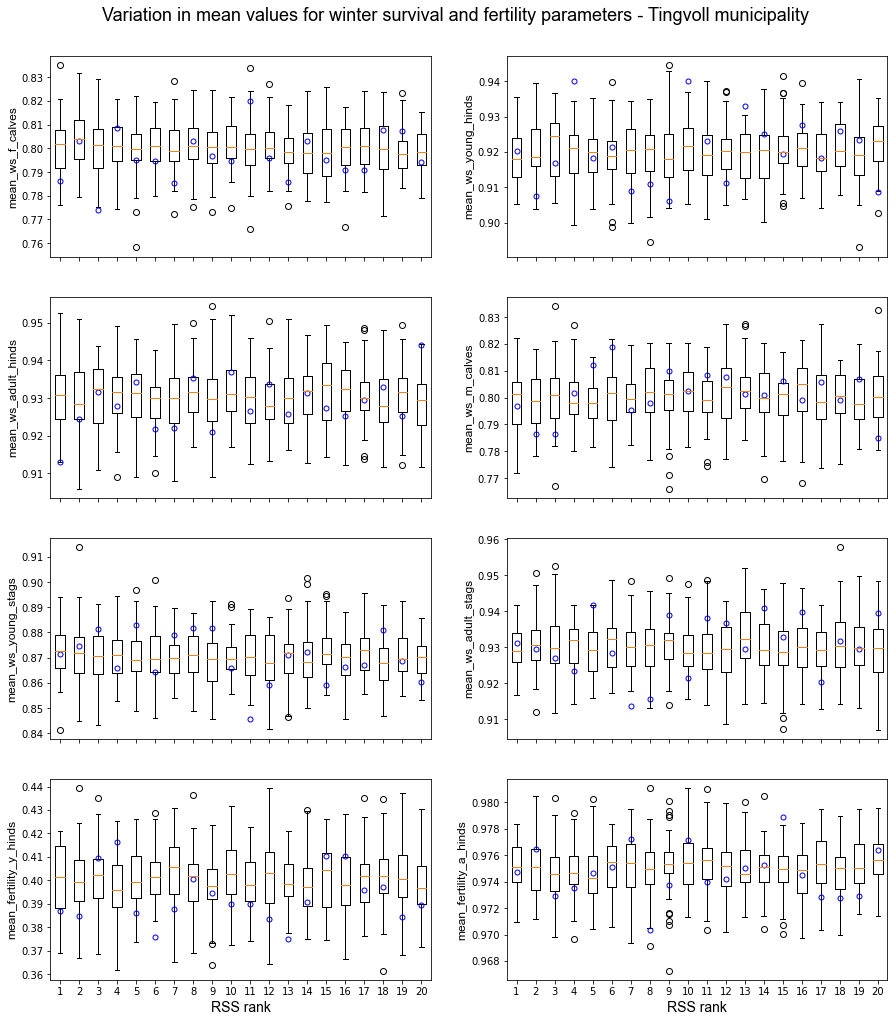

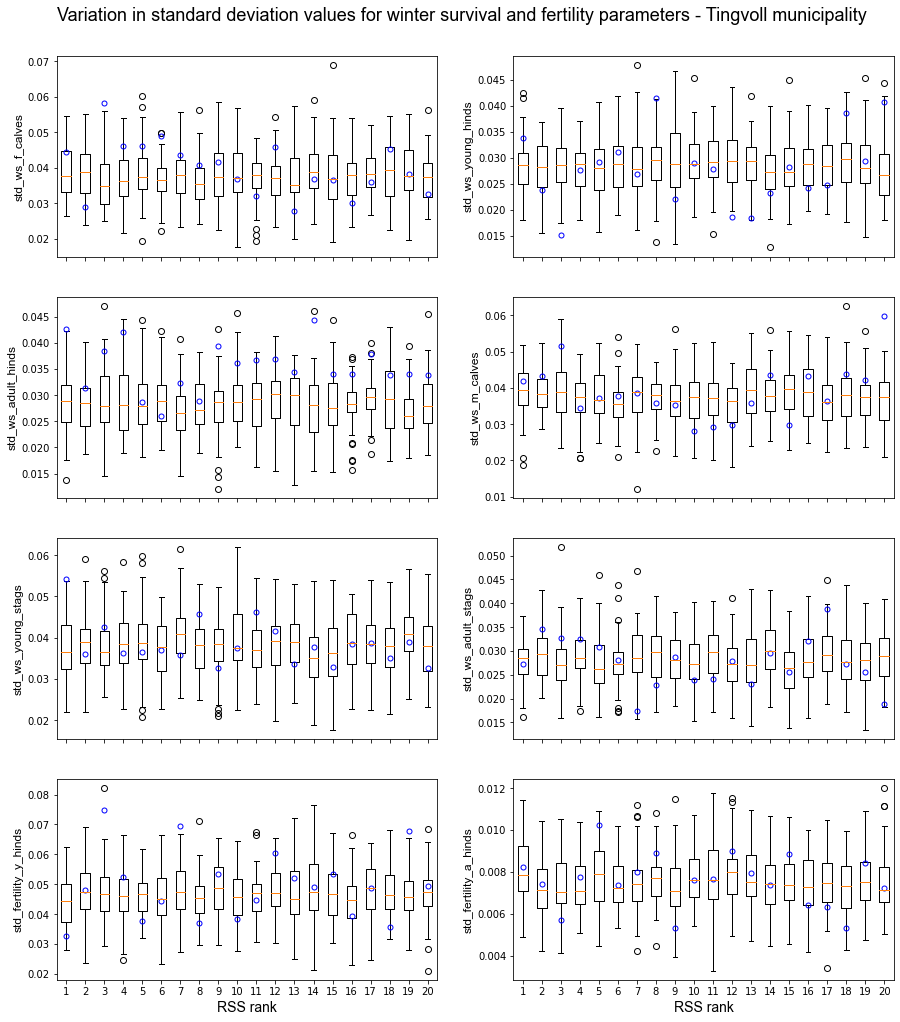

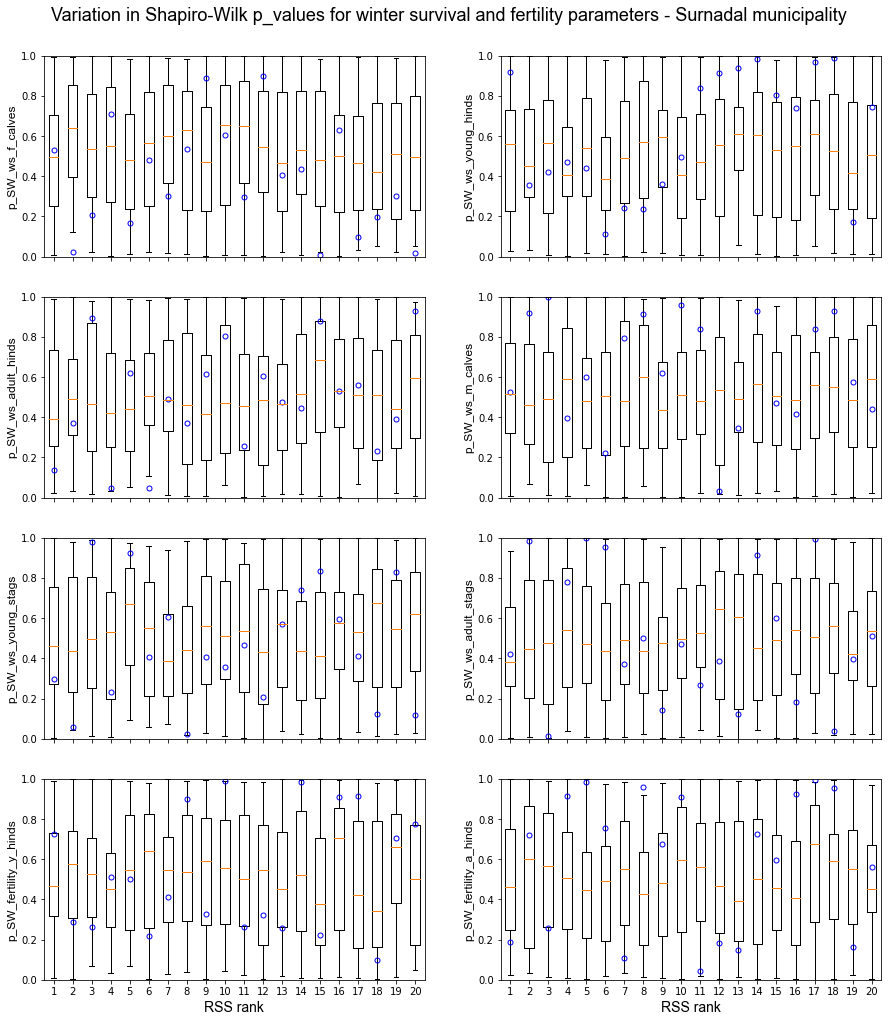

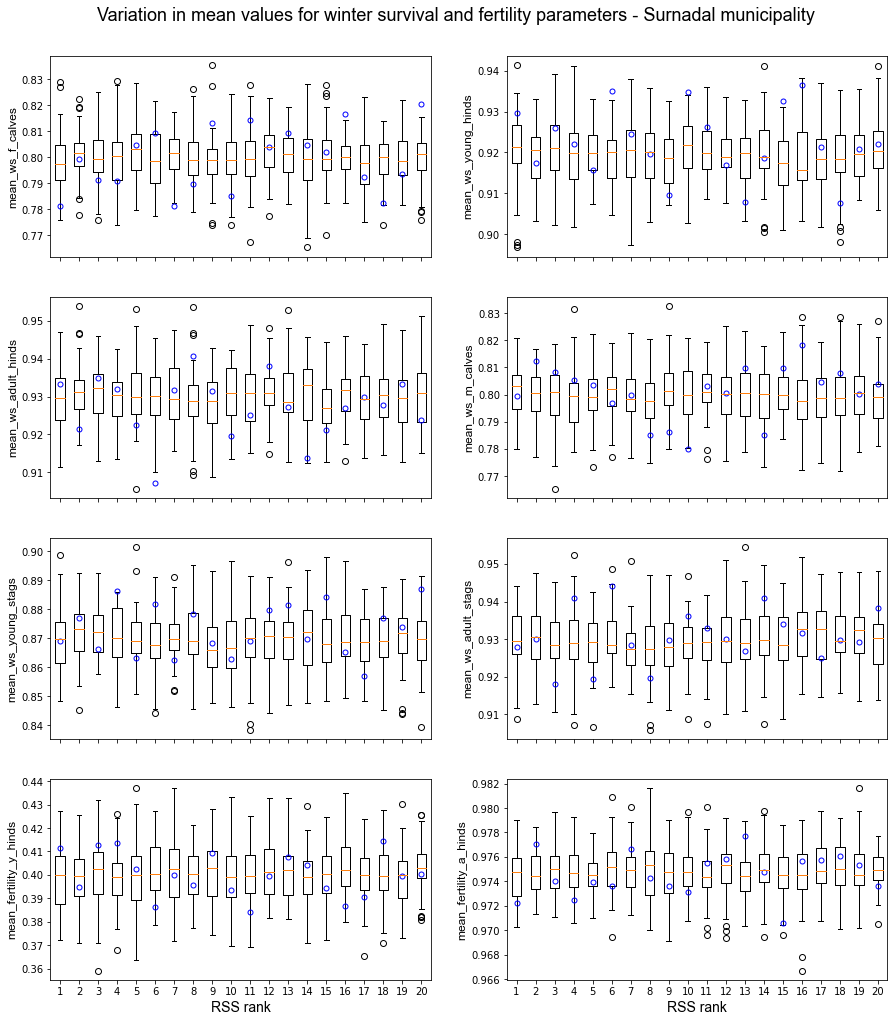

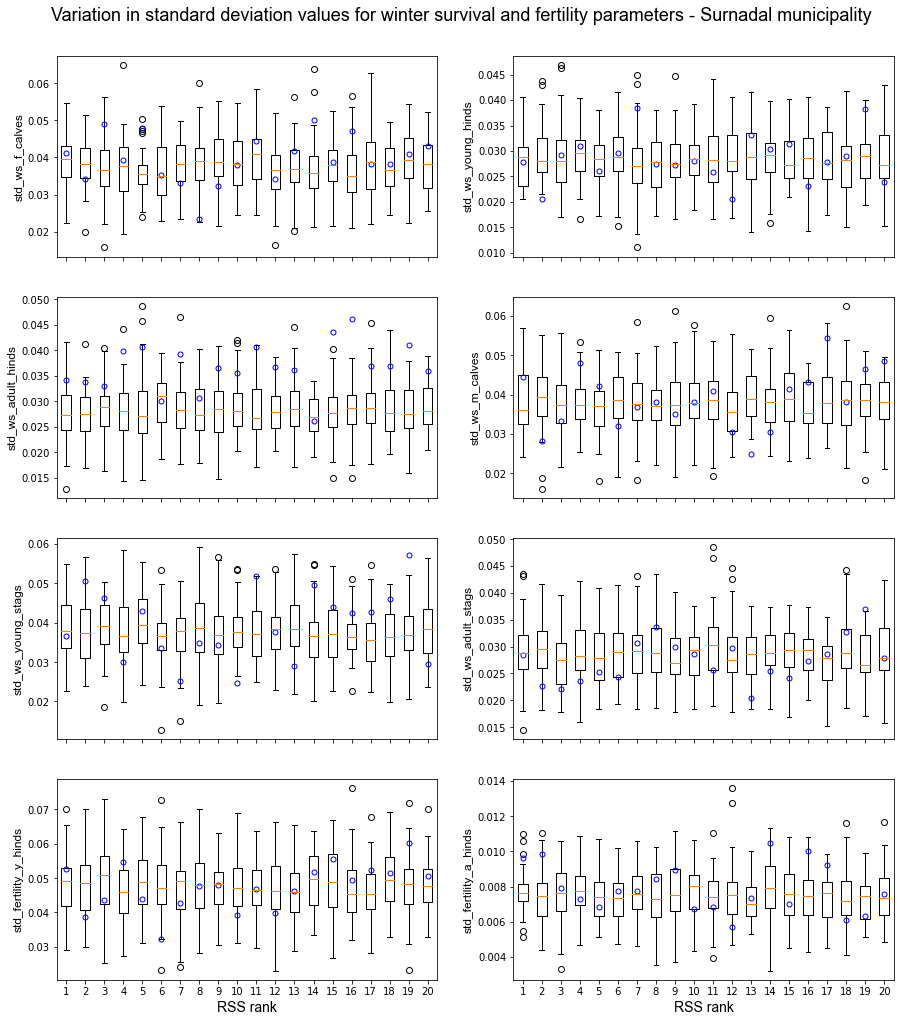

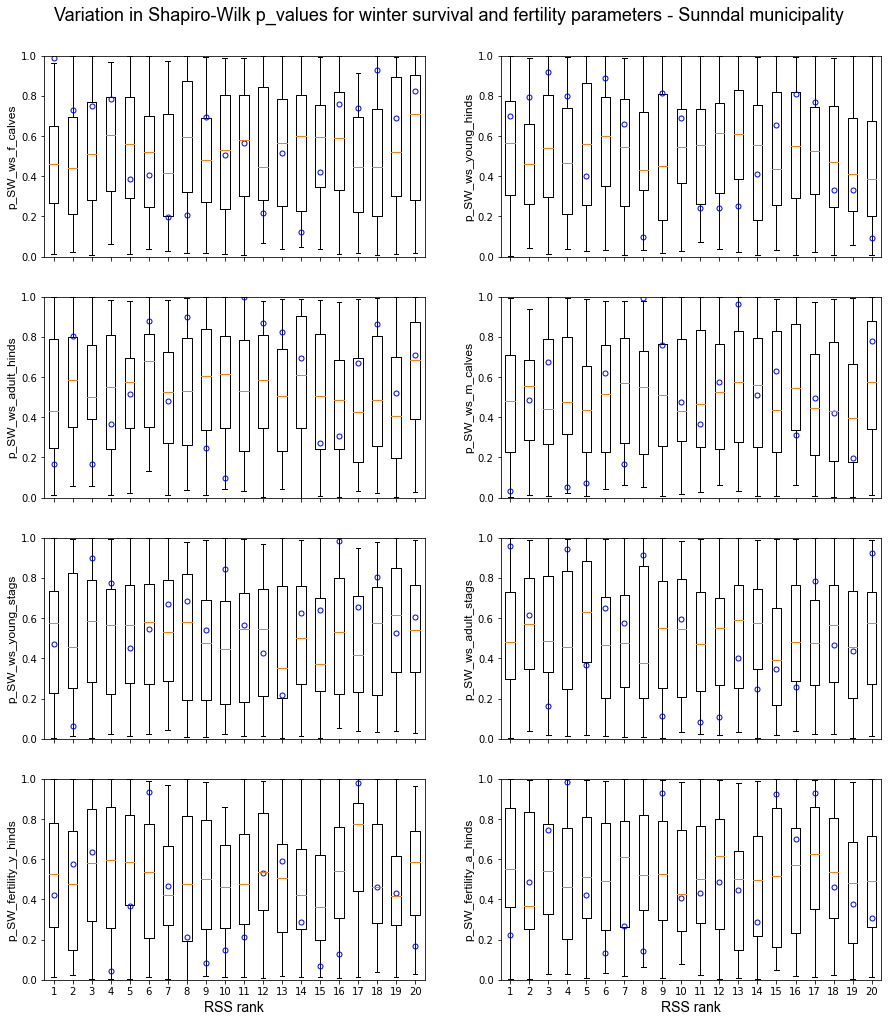

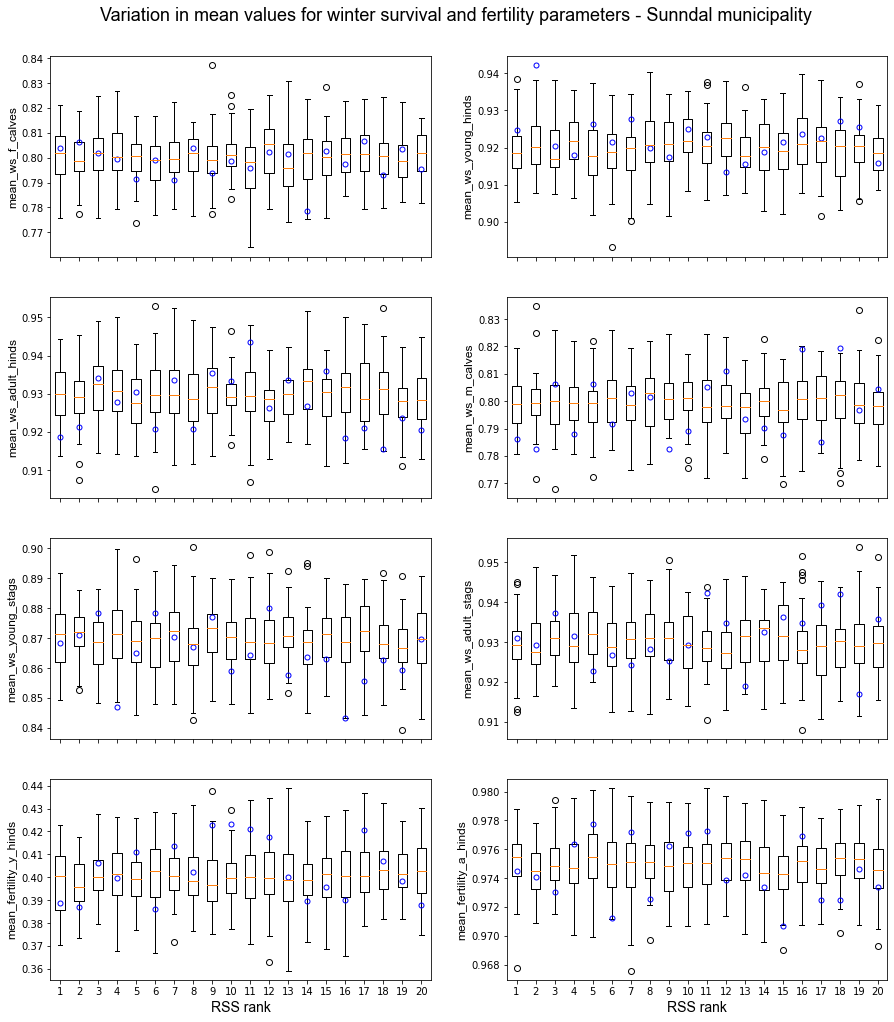

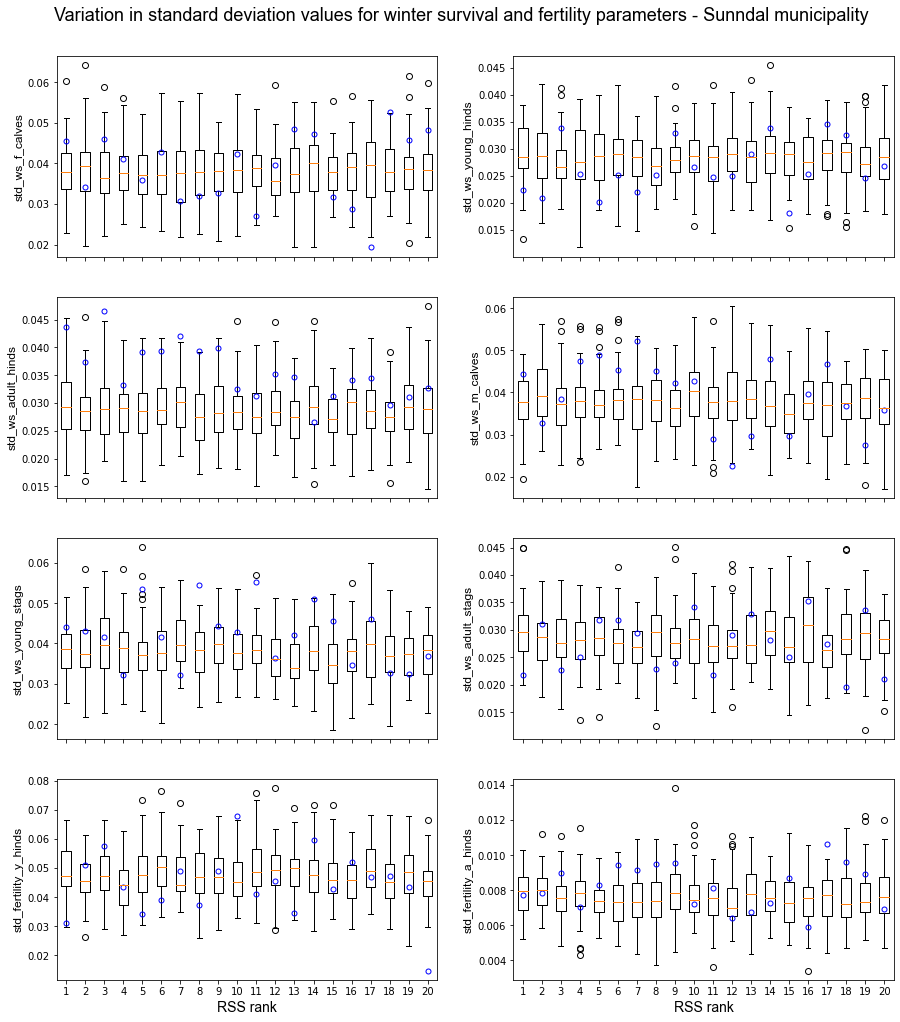

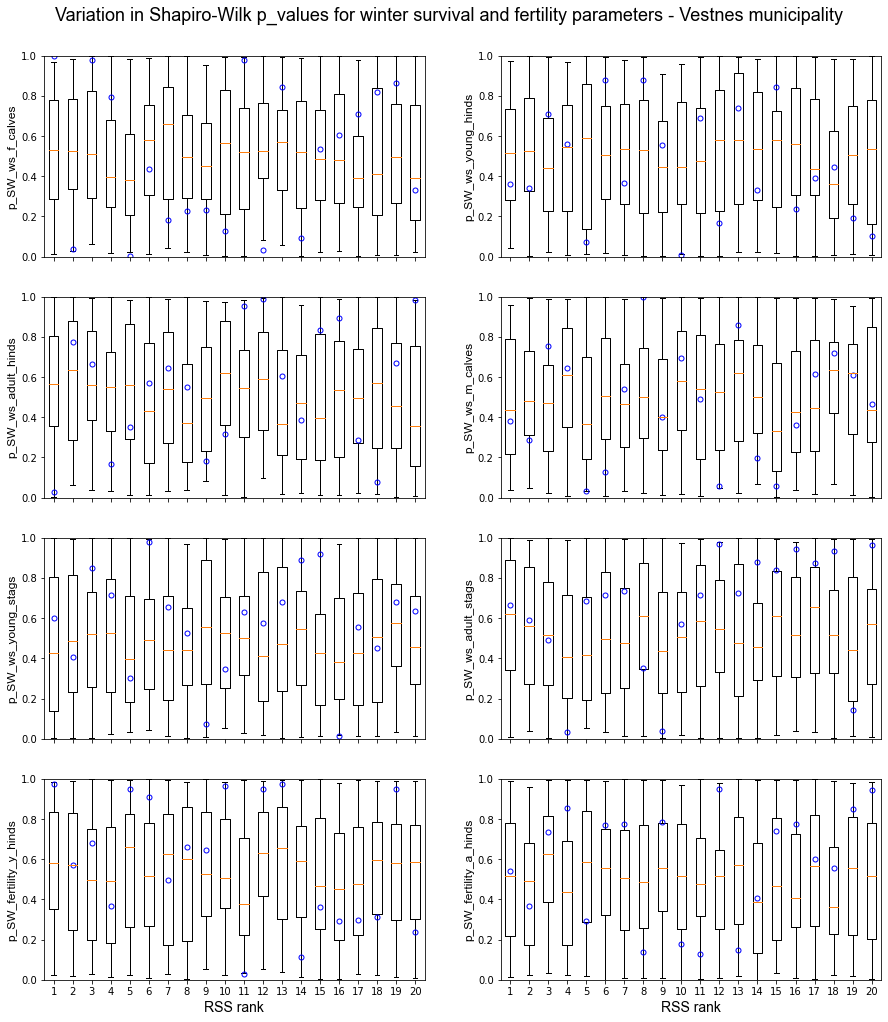

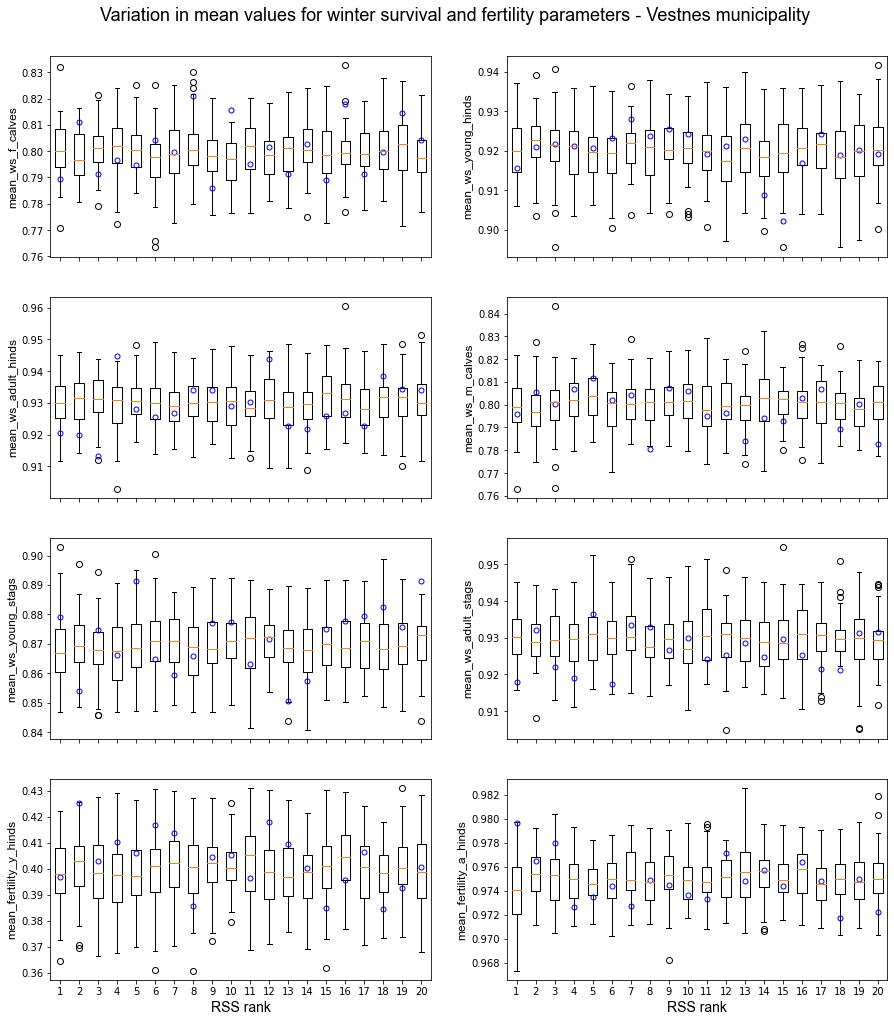

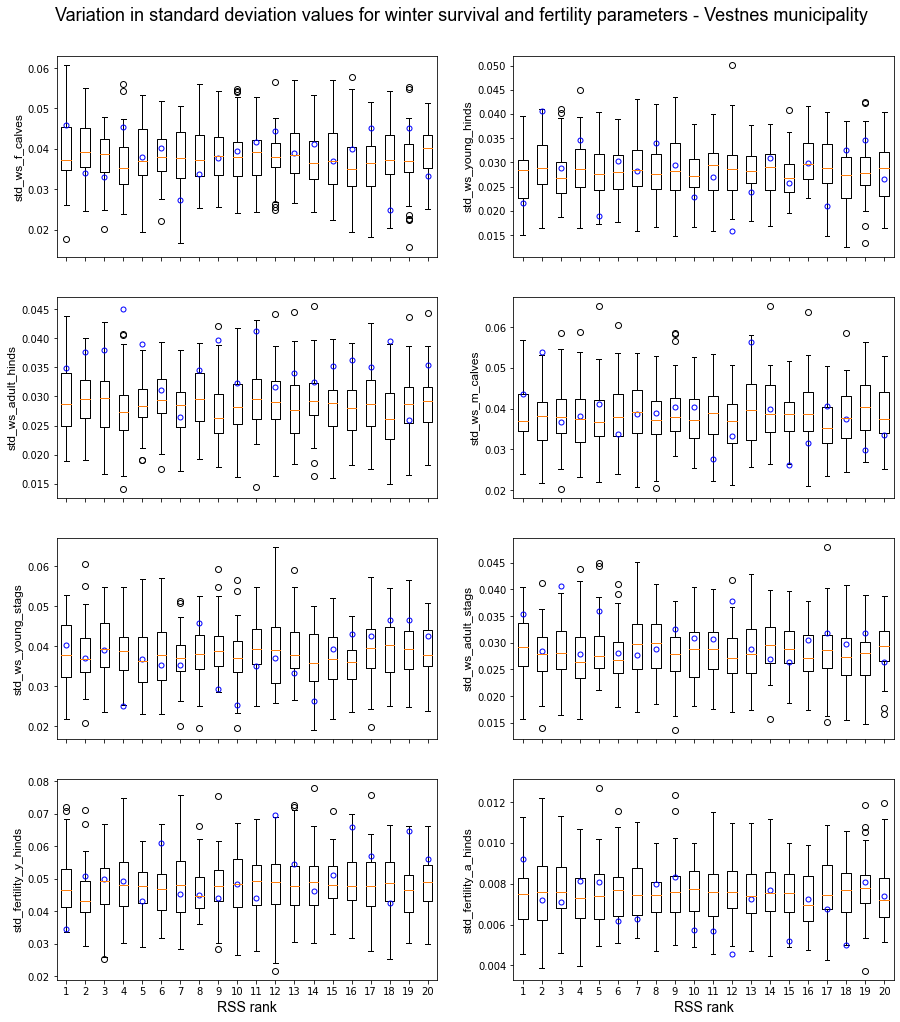

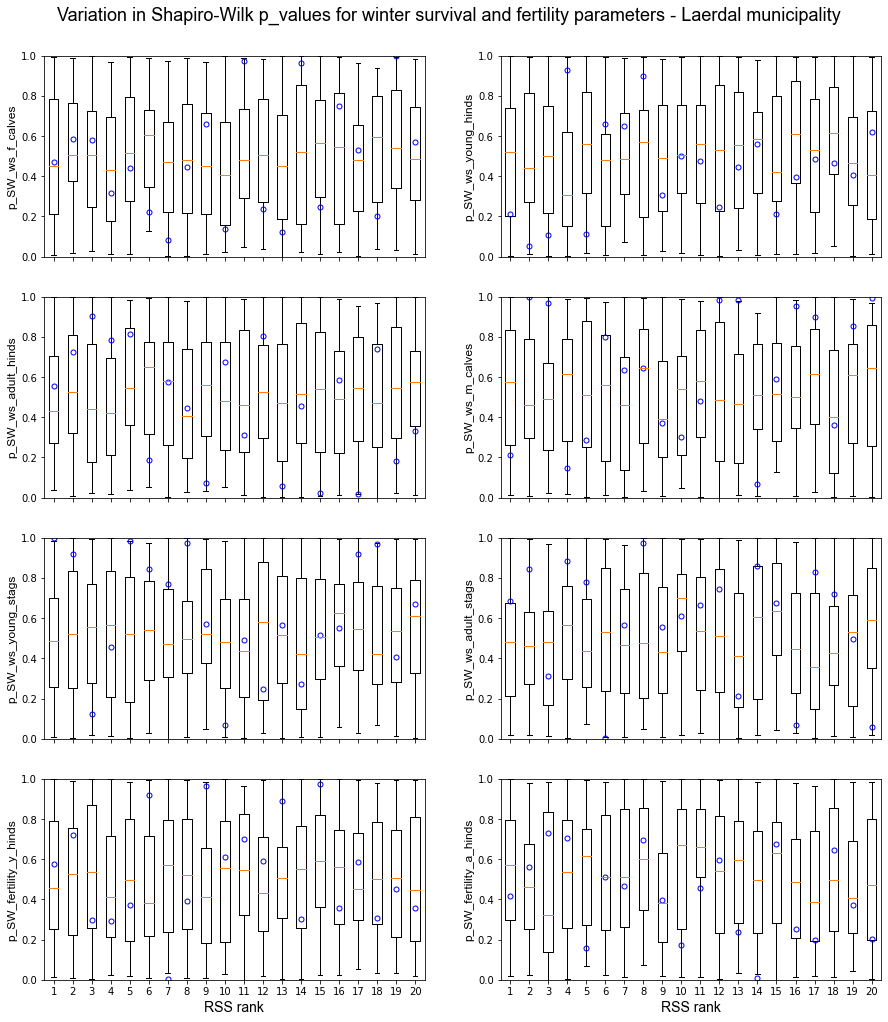

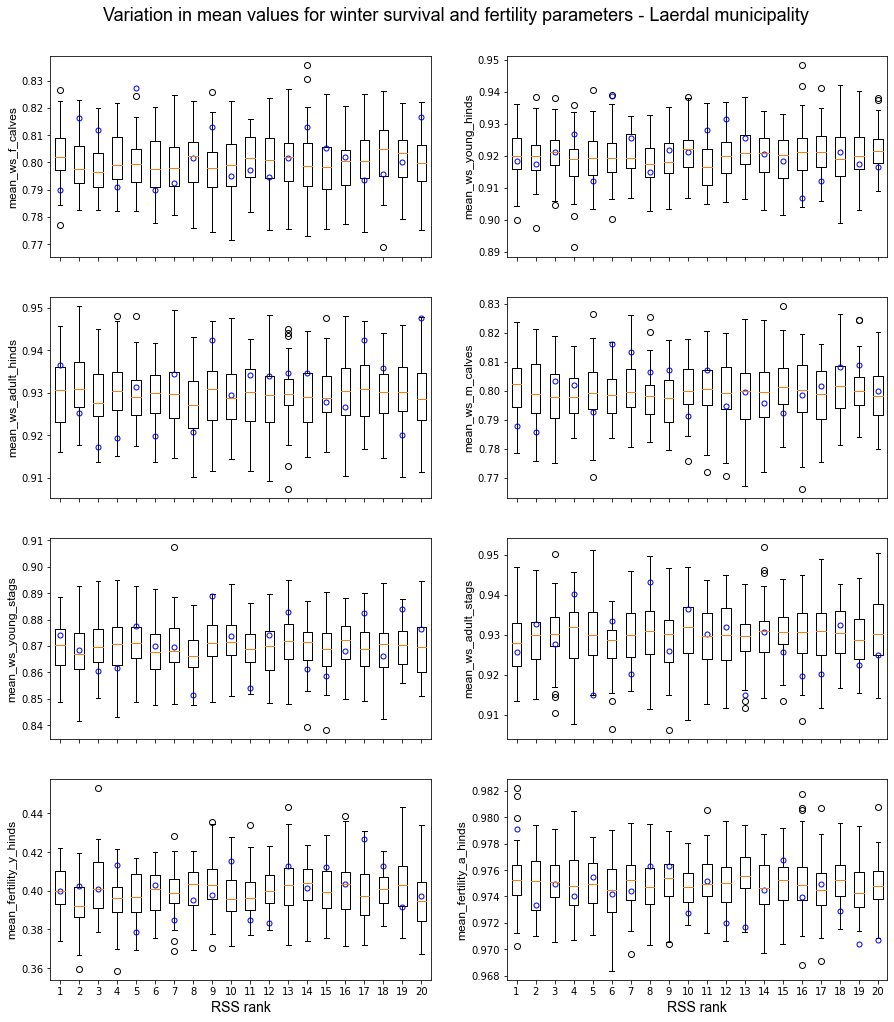

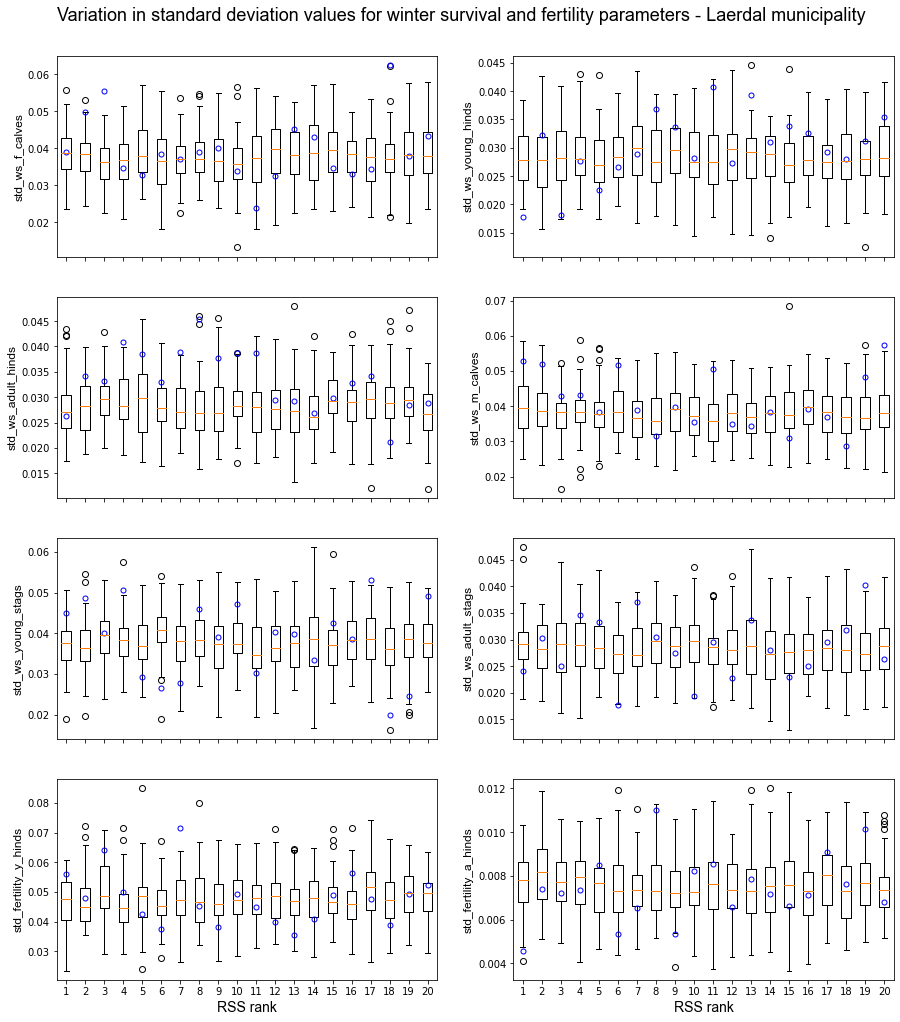

In [13]:
%%time
# Run the show
for municipality in municipalities:
    statistic = Shapiro_Wilk_test(municipality)
    plot_SW_p_values(municipality, statistic)
    plot_SW_mean_values(municipality, statistic)
    plot_SW_std_values(municipality, statistic)